In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv('bank-loan.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
data_copy = data.copy()

In [6]:
data.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

# EDA

In [7]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Checking for Null Values

In [9]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [10]:
data_wona = data[data.default.notnull()]

In [11]:
data_wona.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [12]:
data_wona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [13]:
data_wona.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [14]:
data_wona = data_wona.astype({'default':int})

In [15]:
#data_wona.dtypes

## Checking for Target Distribution 

<AxesSubplot:title={'center':'Distribution of Target Variable'}, xlabel='default', ylabel='count'>

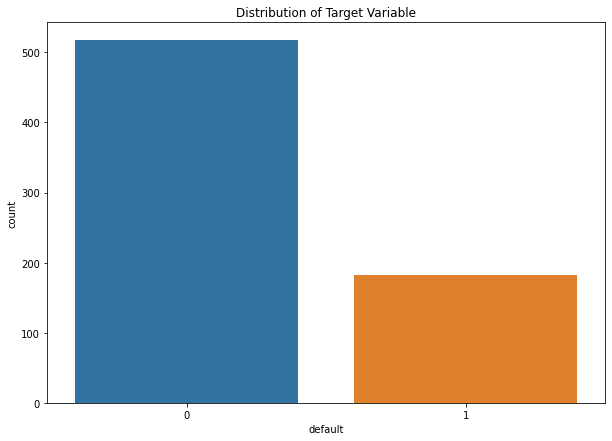

In [16]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Target Variable")
sns.countplot(data_wona['default'])
#plt.legend()

In [17]:
print('Count of 0_targets:',((data_wona['default']==0).sum()), 
      '\nCount of 1_targets:' , ((data_wona['default']==1).sum()),
     '\nPercent of 1_targets:' , ((data_wona['default']==1).sum()/data_wona.shape[0]*100))

Count of 0_targets: 517 
Count of 1_targets: 183 
Percent of 1_targets: 26.142857142857146


In [18]:
t0 = data_wona.iloc[:,0:8][data_wona['default'] == 0]
t1 = data_wona.iloc[:,0:8][data_wona['default'] == 1]

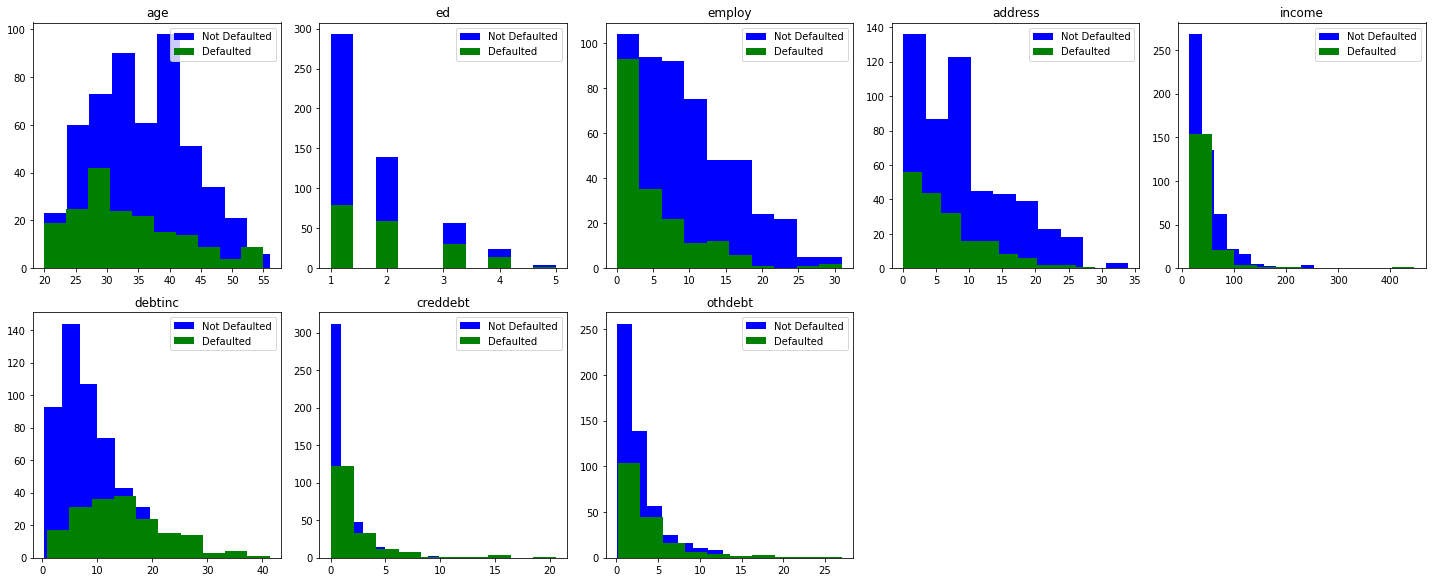

In [19]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data_wona.columns)[0:8]):
    plt.subplot(4,5,i+1)
    plt.hist(t0[col],label = 'Not Defaulted', color = 'blue')
    plt.hist(t1[col],label = 'Defaulted', color = 'Green')
    plt.title(col)
    plt.tight_layout()
    plt.legend()

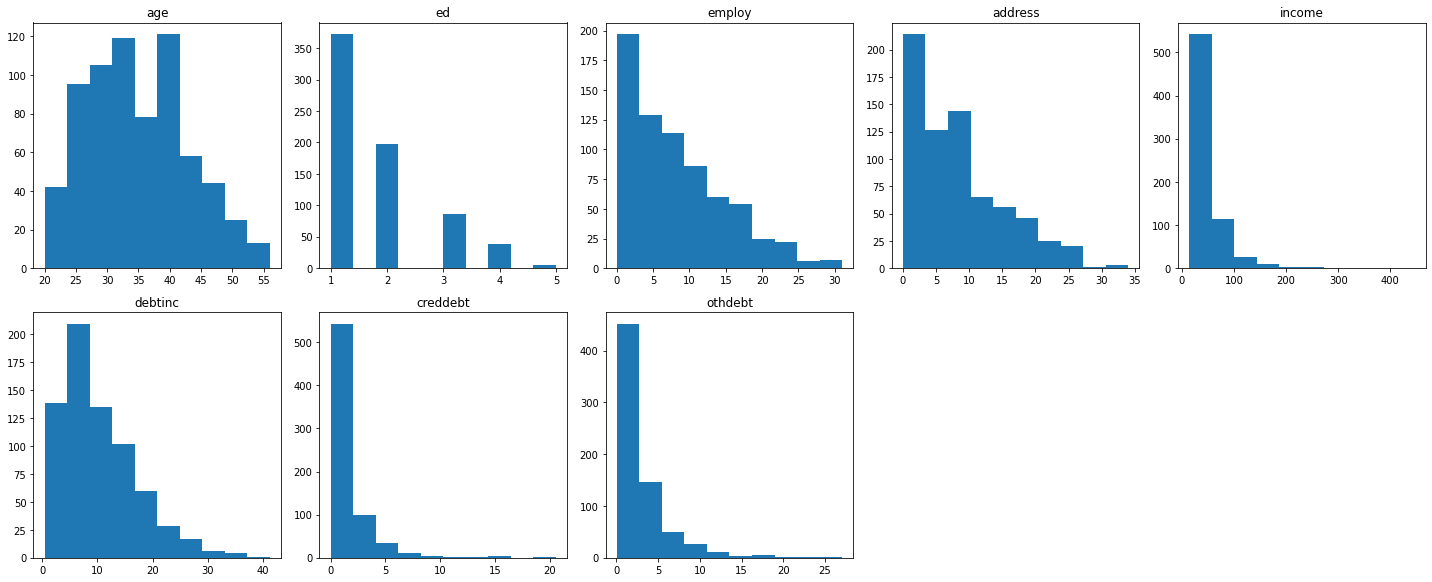

In [20]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data_wona.columns)[0:8]):
    plt.subplot(4,5,i+1)
    plt.hist(data_wona[col])
    plt.title(col)
    plt.tight_layout()
    

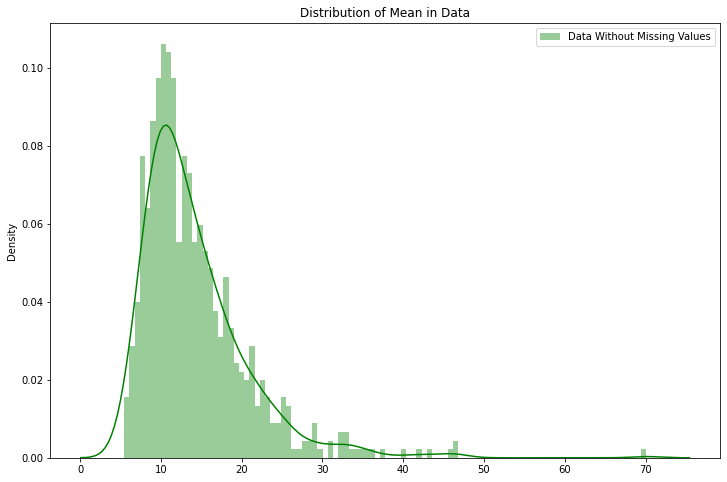

In [21]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Mean in Data')
sns.distplot(data_wona.iloc[:,:8].mean(axis=1),color='green', bins=100, label='Data Without Missing Values')
plt.legend()

In [22]:
data_wona.iloc[:,:8].mean(axis=0)

age         34.860000
ed           1.722857
employ       8.388571
address      8.278571
income      45.601429
debtinc     10.260571
creddebt     1.553553
othdebt      3.058209
dtype: float64

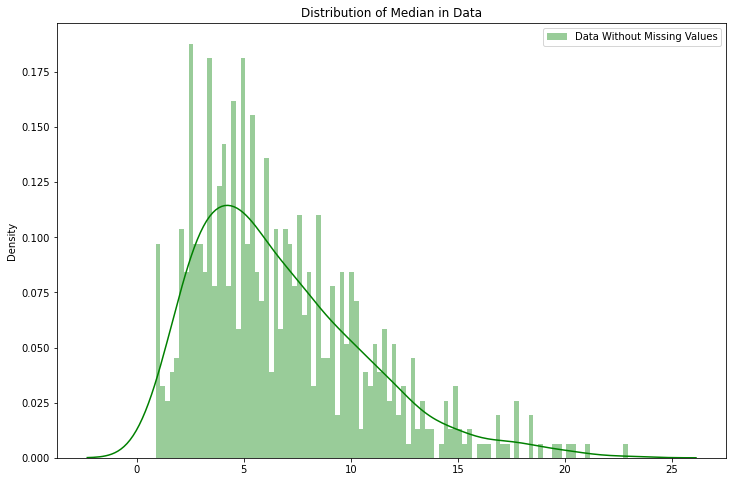

In [23]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Median in Data')
sns.distplot(data_wona.iloc[:,:8].median(axis=1),color='green', bins=100, label='Data Without Missing Values')
plt.legend()

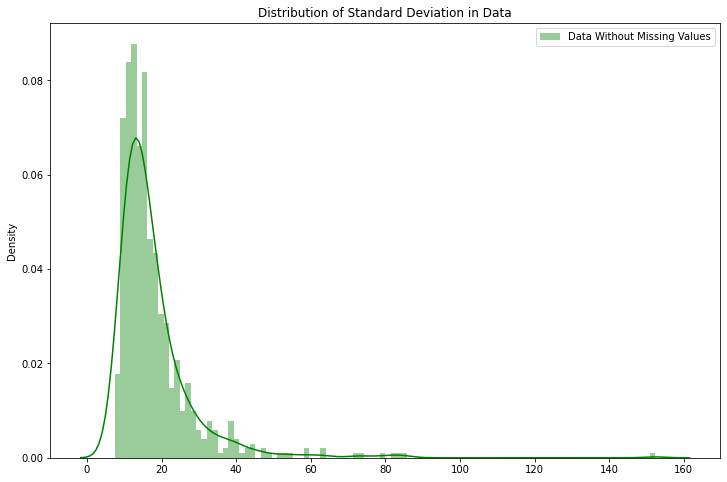

In [24]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Standard Deviation in Data')
sns.distplot(data_wona.iloc[:,:8].std(axis=1),color='green', bins=100, label='Data Without Missing Values')
plt.legend()

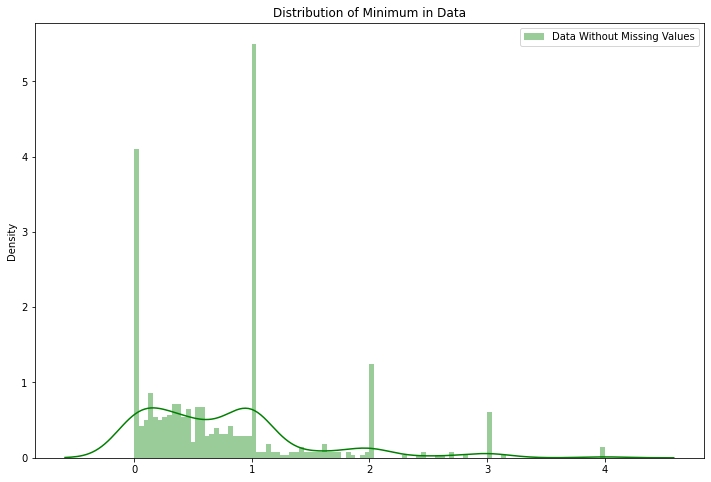

In [25]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Minimum in Data')
sns.distplot(data_wona.iloc[:,:8].min(axis=1),color='green', bins=100, label='Data Without Missing Values')
plt.legend()

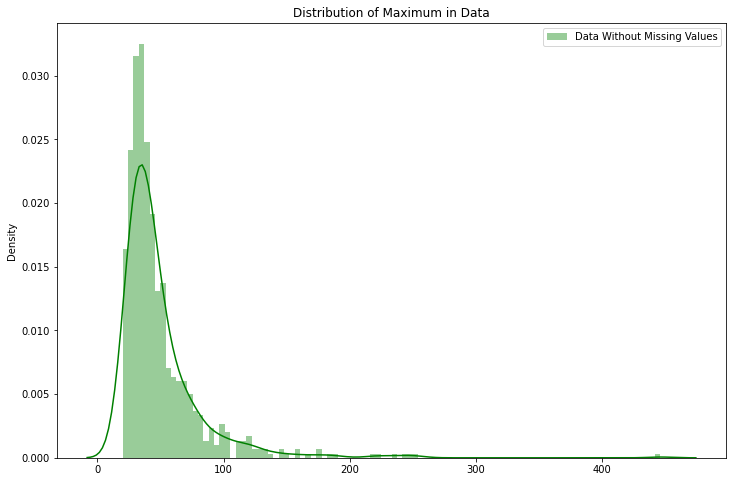

In [26]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Maximum in Data')
sns.distplot(data_wona.iloc[:,:8].max(axis=1),color='green', bins=100, label='Data Without Missing Values')
plt.legend()

## Checking for Correlations 

In [27]:
data_wona_corr = data_wona.corr()
data_wona_corr

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


<AxesSubplot:>

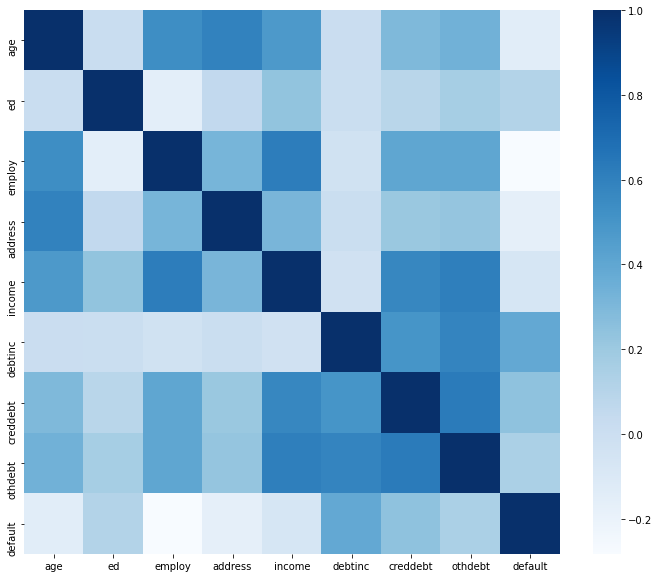

In [28]:
#Plotting Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data_wona_corr, cmap='Blues')

## Outlier Analysis

We will use boxplot to graphically see if there are any outliers and then with the help of a function we will detect the outliers

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


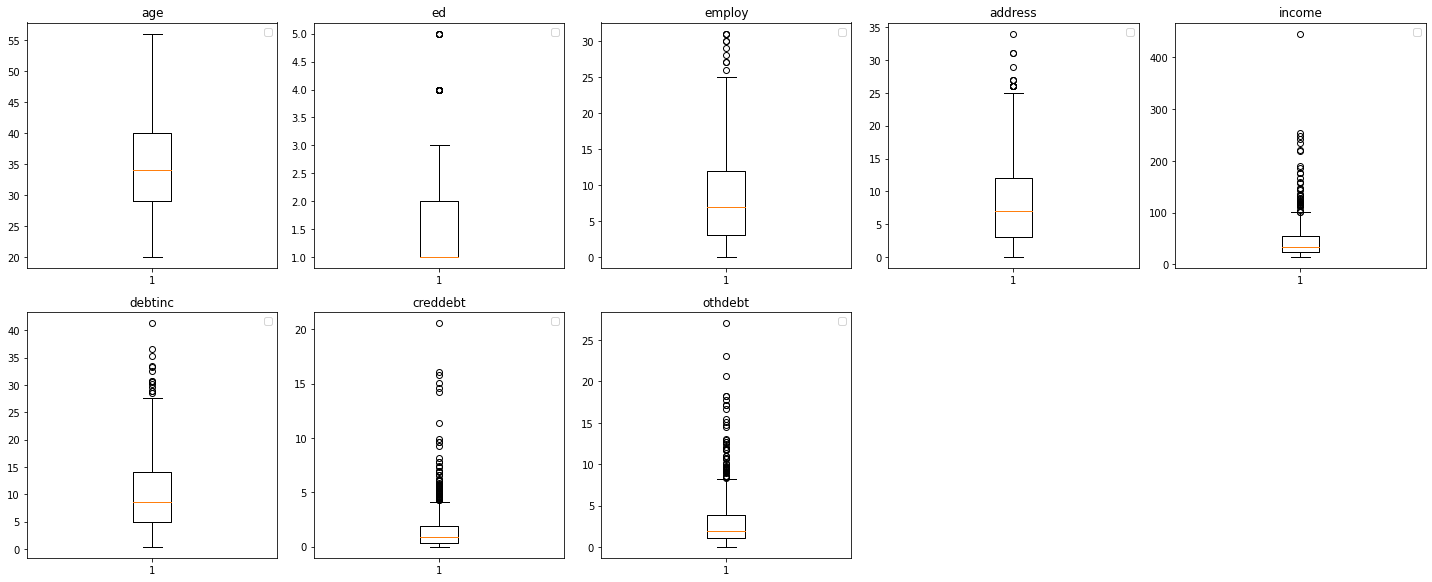

In [29]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data_wona.columns)[0:8]):
    plt.subplot(4,5,i+1)
    plt.boxplot(data_wona[col])
    plt.title(col)
    plt.tight_layout()
    plt.legend()

Using IQR method to find the outliers

In [30]:
def out_IQR(df):
    drop_outliers = np.array([])
    for i in df.columns:
        q1, q3 = np.percentile(df[i],[25,75])
        IQR = q3-q1
        lower_limit = q1-(1.5*IQR)
        upper_limit = q3+(1.5*IQR)
        print(type(lower_limit), type(upper_limit),type(df[i]))
        indexes = df[(df[i] < lower_limit) | (df[i] > upper_limit)].index
        
        drop_outliers = np.append(drop_outliers , indexes)
    return drop_outliers

In [31]:
data_outliers = data_wona.copy()

In [32]:
outliers = np.unique(out_IQR(data_outliers.iloc[:,:8]))
outliers.shape

<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>


(148,)

In [33]:
data_outliers.drop(outliers, inplace = True)

In [34]:
data_outliers.shape

(552, 9)

In [35]:
data_outliers[data_outliers['default'] == 1].count()

age         134
ed          134
employ      134
address     134
income      134
debtinc     134
creddebt    134
othdebt     134
default     134
dtype: int64

In [36]:
data_wona[data_wona['default'] == 1].count()

age         183
ed          183
employ      183
address     183
income      183
debtinc     183
creddebt    183
othdebt     183
default     183
dtype: int64

We can see from above counts of default variable, almost 25 to 30% entries of default = 1 were outliers. Hence we will not be dropping outiers as it signifies that outliers play important role in this case to find out defaulters.

# PCA

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_wona.iloc[:,:8])
scaled_data.shape, type(scaled_data)

((700, 8), numpy.ndarray)

In [39]:
from sklearn.decomposition import PCA

In [40]:
#Calculating PCA with 2 Principal Components. 
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data.shape

(700, 2)

In [41]:
data_labels = data_wona.iloc[:,[8]]
data_feat = data_wona.iloc[:,:8]


In [42]:
#data_feat.head() 
#data_labels

No handles with labels found to put in legend.


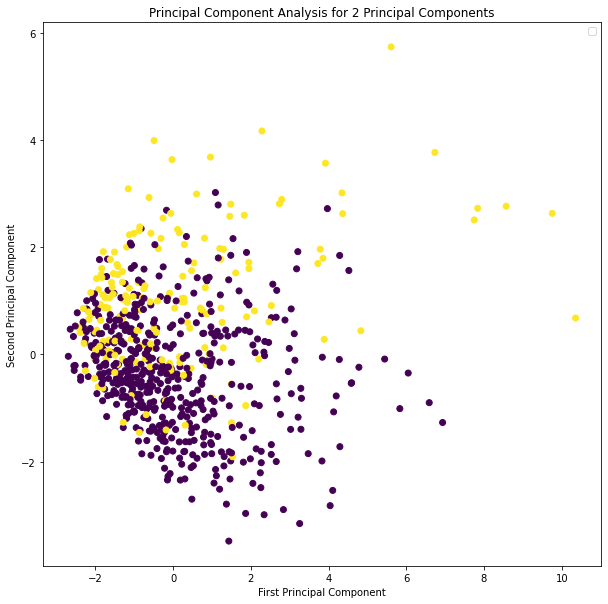

In [43]:
#Visualizing the PCA with 2 principal components and with target variable
plt.figure(figsize = (10,10))
plt.scatter(pca_data[:,0], pca_data[:,1], c = data_labels['default'])
plt.title('Principal Component Analysis for 2 Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [44]:
print((pca.explained_variance_).sum())

4.888336304355215


# Modeling

In [45]:
#scaled_data.shape

In [46]:
#Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data , data_wona.iloc[:,[8]] , test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((560, 8), (140, 8), (560, 1), (140, 1))

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Predicting on training and test data
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr =  lr.predict(X_test)

#Calculating and printing f1 score for train and test
f1_train_lr = f1_score(y_train,y_train_pred_lr)
f1_test_lr = f1_score(y_test,y_test_pred_lr)
print('The f1 score for the training data:', f1_train_lr)
print('The f1 score for the testing data:', f1_test_lr)

# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_lr = lr.predict_proba(X_train)[:,1]
y_test_pred_prob_lr = lr.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_lr_auc = roc_auc_score(y_train, y_train_pred_prob_lr)
y_test_pred_lr_auc = roc_auc_score(y_test, y_test_pred_prob_lr)
print('The AUC for train data: %.3f'% (y_train_pred_lr_auc))
print('The AUC for test data: %.3f'% (y_test_pred_lr_auc))

The f1 score for the training data: 0.540084388185654
The f1 score for the testing data: 0.6875
The AUC for train data: 0.845
The AUC for test data: 0.911


In [49]:
#Calculating the ROC Curve
train_fpr_lr, train_tpr_lr, train_threshold_lr = roc_curve(y_train,y_train_pred_prob_lr)
test_fpr_lr, test_tpr_lr, test_threshold_lr = roc_curve(y_test,y_test_pred_prob_lr)

In [50]:
#train_threshold_lr, test_threshold_lr

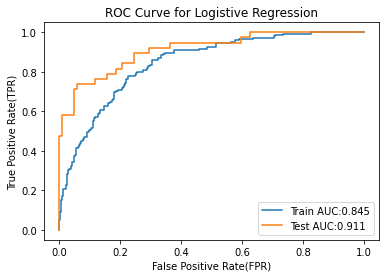

In [51]:
#Plotting the ROC Curve
plt.plot(train_fpr_lr,train_tpr_lr, label='Train AUC:%.3f'% (y_train_pred_lr_auc))
plt.plot(test_fpr_lr,test_tpr_lr, label='Test AUC:%.3f'% (y_test_pred_lr_auc))

plt.title("ROC Curve for Logistive Regression")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()


In [52]:
#Classification Reports for Train and Test
from sklearn.metrics import classification_report
print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_lr))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_lr))

Classification Report of Train:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       415
           1       0.70      0.44      0.54       145

    accuracy                           0.81       560
   macro avg       0.76      0.69      0.71       560
weighted avg       0.79      0.81      0.79       560

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       102
           1       0.85      0.58      0.69        38

    accuracy                           0.86       140
   macro avg       0.85      0.77      0.80       140
weighted avg       0.86      0.86      0.85       140



In [53]:
#Confusion Matrices for Train and Test
cm_train_lr = confusion_matrix(y_train,y_train_pred_lr)
cm_train_df_lr = pd.DataFrame(cm_train_lr)

cm_test_lr = confusion_matrix(y_test,y_test_pred_lr)
cm_test_df_lr = pd.DataFrame(cm_test_lr)

print('Confusion Matrix for Train')
print(cm_train_df_lr)
print('Confusion Matrix for Test')
print(cm_test_df_lr)

Confusion Matrix for Train
     0   1
0  387  28
1   81  64
Confusion Matrix for Test
    0   1
0  98   4
1  16  22


Text(0.5, 1.0, 'Confustion Matrix of train')

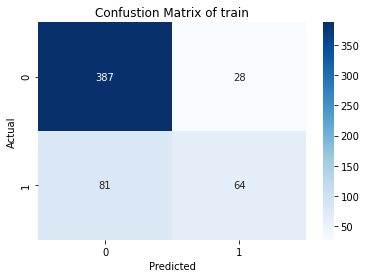

In [54]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_df_lr, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

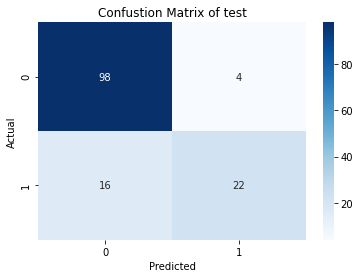

In [55]:
#Plotting Heatmap for Test Confusion Matrix
sns.heatmap(cm_test_df_lr, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

## Random Forest with GridSearchCV Hyperparameter Tuning

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [57]:
parameter_grid = {'n_estimators':[110,120,130],'max_depth':[15,20,25],'min_samples_split':[90,100,110],'min_samples_leaf':[5,10,15]}
print(parameter_grid)

{'n_estimators': [110, 120, 130], 'max_depth': [15, 20, 25], 'min_samples_split': [90, 100, 110], 'min_samples_leaf': [5, 10, 15]}


In [58]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_clf, param_grid = parameter_grid,scoring='roc_auc', cv = 3, verbose = 3, n_jobs = -1)

In [59]:
#Fitting the model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [90, 100, 110],
                         'n_estimators': [110, 120, 130]},
             scoring='roc_auc', verbose=3)

In [60]:
#Let us check which are the best parameters predicted by our model
rf_grid.best_params_

{'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 90,
 'n_estimators': 110}

In [61]:
#Predicting on training and test data
y_train_pred_rf_gsv = rf_grid.predict(X_train)
y_test_pred_rf_gsv =  rf_grid.predict(X_test)

#Calculating and printing f1 score for train and test
f1_train_rf_gsv = f1_score(y_train,y_train_pred_rf_gsv)
f1_test_rf_gsv = f1_score(y_test,y_test_pred_rf_gsv)
print('The f1 score for the testing data:', f1_train_rf_gsv)
print('The f1 score for the testing data:', f1_test_rf_gsv)


# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_rf_gsv = rf_grid.predict_proba(X_train)[:,1]
y_test_pred_prob_rf_gsv = rf_grid.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_rf_gsv_auc = roc_auc_score(y_train, y_train_pred_prob_rf_gsv)
y_test_pred_rf_gsv_auc = roc_auc_score(y_test, y_test_pred_prob_rf_gsv)
print('The AUC for train data: %.3f'% (y_train_pred_rf_gsv_auc))
print('The AUC for test data: %.3f'% (y_test_pred_rf_gsv_auc))

The f1 score for the testing data: 0.37158469945355194
The f1 score for the testing data: 0.26666666666666666
The AUC for train data: 0.869
The AUC for test data: 0.818


In [62]:
#Calculating the ROC Curve
train_fpr_rf_gsv, train_tpr_rf_gsv, train_threshold_rf_gsv = roc_curve(y_train,y_train_pred_prob_rf_gsv)
test_fpr_rf_gsv, test_tpr_rf_gsv, test_threshold_rf_gsv = roc_curve(y_test,y_test_pred_prob_rf_gsv)

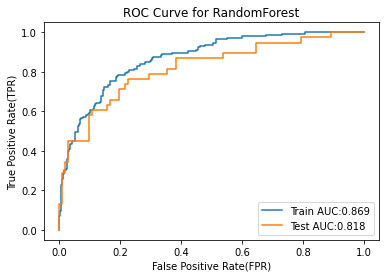

In [63]:
#Plotting the ROC Curve
plt.plot(train_fpr_rf_gsv,train_tpr_rf_gsv, label='Train AUC:%.3f'% (y_train_pred_rf_gsv_auc))
plt.plot(test_fpr_rf_gsv,test_tpr_rf_gsv, label='Test AUC:%.3f'% (y_test_pred_rf_gsv_auc))

plt.title("ROC Curve for RandomForest")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [64]:
#Classification Reports for Train and Test
from sklearn.metrics import classification_report
print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_rf_gsv))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_rf_gsv))

Classification Report of Train:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       415
           1       0.89      0.23      0.37       145

    accuracy                           0.79       560
   macro avg       0.84      0.61      0.62       560
weighted avg       0.82      0.79      0.75       560

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       102
           1       0.86      0.16      0.27        38

    accuracy                           0.76       140
   macro avg       0.81      0.57      0.56       140
weighted avg       0.79      0.76      0.70       140



In [65]:
#Confusion Matrices for Train and Test
cm_train_rf_gsv = confusion_matrix(y_train,y_train_pred_rf_gsv)
cm_train_df_rf_gsv = pd.DataFrame(cm_train_rf_gsv)

cm_test_rf_gsv = confusion_matrix(y_test,y_test_pred_rf_gsv)
cm_test_df_rf_gsv = pd.DataFrame(cm_test_rf_gsv)

print('Confusion Matrix for Train')
print(cm_train_df_rf_gsv)
print('Confusion Matrix for Test')
print(cm_test_df_rf_gsv)

Confusion Matrix for Train
     0   1
0  411   4
1  111  34
Confusion Matrix for Test
     0  1
0  101  1
1   32  6


Text(0.5, 1.0, 'Confustion Matrix of train')

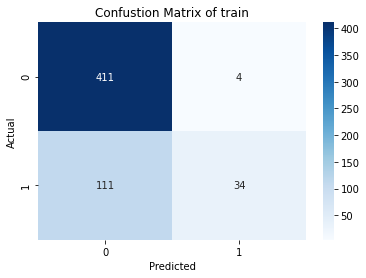

In [66]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_df_rf_gsv, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

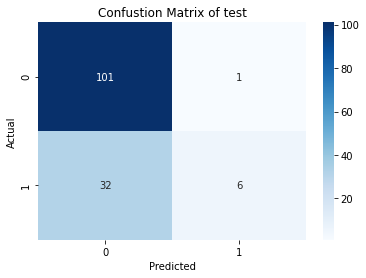

In [67]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_test_df_rf_gsv, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

## XgBoost with HyperParameter Tuning

In [68]:
#Importing Xgboost and RandomSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [69]:
parameters = {
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [1,3,5],
    'min_child_weight': [3,5,7],
    'gamma': [0,0.2,0.4],
    'colsample_bytree': [0.3,0.4,0.5]
}

In [70]:
xgb_clf = xgb.XGBClassifier()

In [71]:
xgb_rsv = RandomizedSearchCV(xgb_clf, param_distributions=parameters, n_jobs=-1,cv=3,verbose=3,scoring='roc_auc',random_state=42)

In [72]:
#Fitting the model
xgb_rsv.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[18:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [73]:
xgb_rsv.best_params_

{'min_child_weight': 3,
 'max_depth': 1,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.3}

In [74]:
#Predicting on training and test data
y_train_pred_xgb = xgb_rsv.predict(X_train)
y_test_pred_xgb =  xgb_rsv.predict(X_test)

In [75]:
#Calculating and printing f1 score for train and test
f1_train_xgb = f1_score(y_train,y_train_pred_xgb)
f1_test_xgb = f1_score(y_test,y_test_pred_xgb)
print('The f1 score for the training data:', f1_train_xgb)
print('The f1 score for the testing data:', f1_test_xgb)


# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_xgb = xgb_rsv.predict_proba(X_train)[:,1]
y_test_pred_prob_xgb = xgb_rsv.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_xgb_auc = roc_auc_score(y_train, y_train_pred_prob_xgb)
y_test_pred_xgb_auc = roc_auc_score(y_test, y_test_pred_prob_xgb)
print('The AUC for train data: %.3f'% (y_train_pred_xgb_auc))
print('The AUC for test data: %.3f'% (y_test_pred_xgb_auc))

The f1 score for the training data: 0.5974025974025975
The f1 score for the testing data: 0.5937499999999999
The AUC for train data: 0.886
The AUC for test data: 0.856


In [76]:
#Calculating the ROC Curve
train_fpr_xgb, train_tpr_xgb, train_threshold_xgb = roc_curve(y_train,y_train_pred_prob_xgb)
test_fpr_xgb, test_tpr_xgb, test_threshold_xgb = roc_curve(y_test,y_test_pred_prob_xgb)

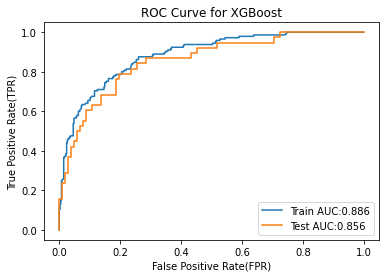

In [77]:
#Plotting the ROC Curve
plt.plot(train_fpr_xgb,train_tpr_xgb, label='Train AUC:%.3f'% (y_train_pred_xgb_auc))
plt.plot(test_fpr_xgb,test_tpr_xgb, label='Test AUC:%.3f'% (y_test_pred_xgb_auc))

plt.title("ROC Curve for XGBoost")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [78]:
#Classification Reports for Train and Test

print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_xgb))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_xgb))

Classification Report of Train:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       415
           1       0.80      0.48      0.60       145

    accuracy                           0.83       560
   macro avg       0.82      0.72      0.75       560
weighted avg       0.83      0.83      0.82       560

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       102
           1       0.73      0.50      0.59        38

    accuracy                           0.81       140
   macro avg       0.78      0.72      0.74       140
weighted avg       0.81      0.81      0.80       140



In [79]:
from sklearn import metrics
train_recall_xgb = metrics.recall_score(y_train, y_train_pred_xgb)
train_precision_xgb = metrics.precision_score(y_train, y_train_pred_xgb)
print('Train Precision:%.3f'% train_precision_xgb)
print('Train Recall:%.3f'% train_recall_xgb)

test_recall_xgb = metrics.recall_score(y_test, y_test_pred_xgb)
train_precision_xgb = metrics.precision_score(y_test, y_test_pred_xgb)
print('Test Precision:%.3f'% train_precision_xgb)
print('Test Recall:%.3f'% test_recall_xgb)

Train Precision:0.802
Train Recall:0.476
Test Precision:0.731
Test Recall:0.500


In [80]:
cm_train_mat_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print(cm_train_mat_xgb)
cm_test_mat_xbg = confusion_matrix(y_test, y_test_pred_xgb)
print(cm_test_mat_xbg)

[[398  17]
 [ 76  69]]
[[95  7]
 [19 19]]


Text(0.5, 1.0, 'Confustion Matrix of train')

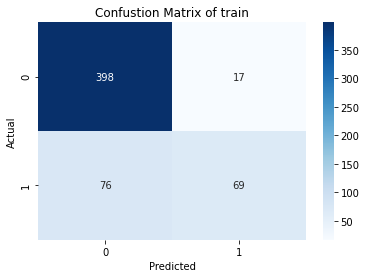

In [81]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_mat_xgb, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

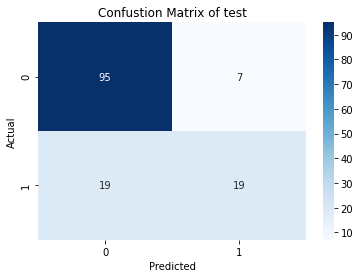

In [82]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_test_mat_xbg, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

In [84]:
import pickle
file = open('xgboost_model.pkl','wb')

#Dumping the info to the file
pickle.dump(xgb_rsv,file)